In [33]:
import sys
sys.path.append("C:\ZSOMBI\OneDrive\PoPy")
sys.path.append("/Users/zsombi/OneDrive/PoPy")

import pandas as pd

from popy.io_tools import load_behavior, load_neural_data
from popy.behavior_data_tools import *
from popy.neural_data_tools import time_normalize_session, scale_neural_data, remove_low_fr_neurons, remove_trunctuated_neurons, add_firing_rates
from popy.decoders import *
from popy.plotting_tools import *
import popy.config as cfg

In [34]:
monkey, session = 'ka', '070722'

In [35]:
print(f"****  Processing {monkey} {session}\n")
# load data

spike_data = load_neural_data(monkey, session, 'spikes')
rate_data = add_firing_rates(spike_data, method='gauss', win_len=.05)

rate_data.shape

****  Processing ka 070722

Loading spikes data


(70, 349732)

# Check if activity is correlated with time

In [36]:
import scipy.stats as stats
from scipy.stats import pearsonr

time_vector = rate_data['time']

corrs, pvals = [], []
for unit_id in range(rate_data.shape[0]):
    rate_data_curr = rate_data[unit_id, :]
    
    # measure correlation between time and firing rate
    corr, pval = pearsonr(time_vector, rate_data_curr)

    corrs.append(corr)
    pvals.append(pval)

corrs = np.array(corrs)
pvals = np.array(pvals)

print(f'Number of units with significant correlation: {np.sum(pvals < .05)} / {rate_data.shape[0]}')
print(f'units with significant correlation: {np.where(pvals < .01)[0]}')

Number of units with significant correlation: 70 / 70
units with significant correlation: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]


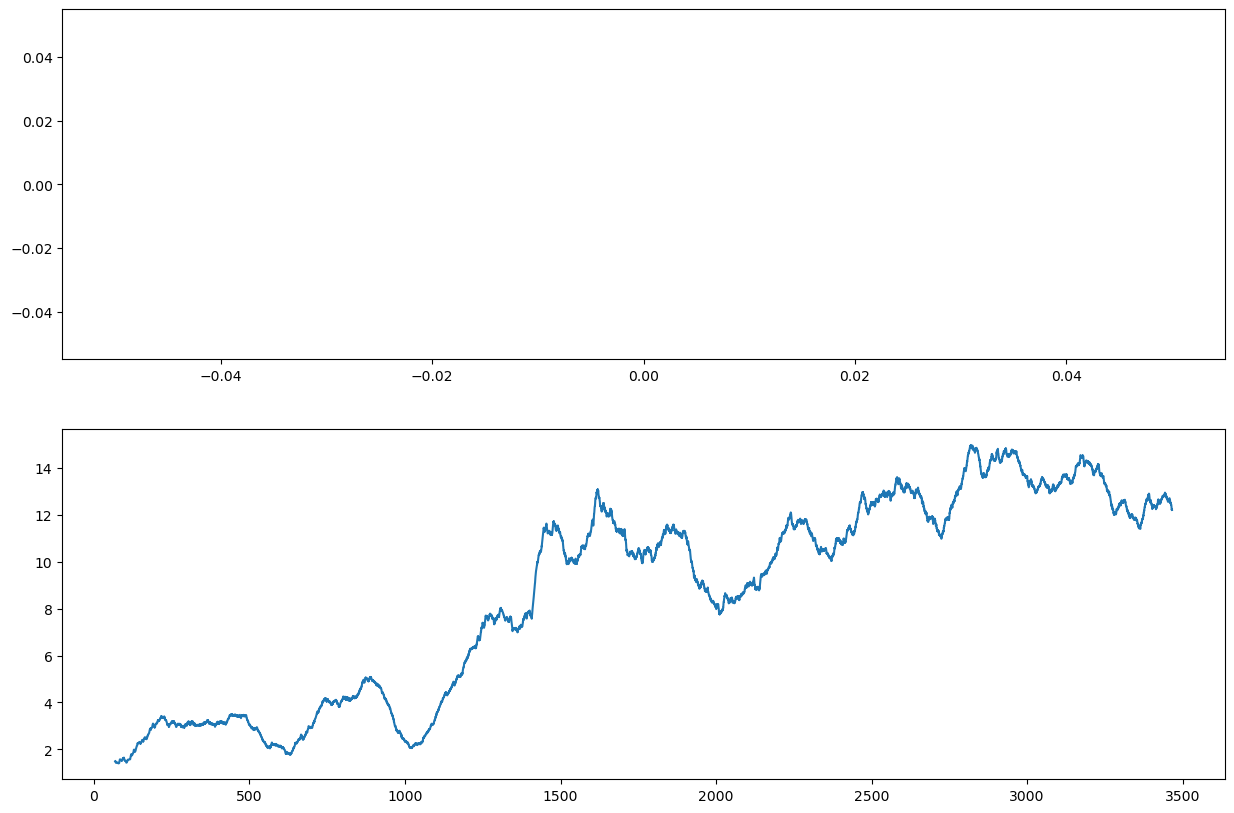

In [44]:
t0, t1 = 10, 15  # seconds
unit_id = 2

time_vector = rate_data['time']

# get time of interest
ids_of_interest = np.where((time_vector >= t0) & (time_vector <= t1))[0]
time_vector_temp = time_vector[ids_of_interest]
count_data_temp = rate_data[unit_id, ids_of_interest]

fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(time_vector_temp, count_data_temp)

# plot moving average of the data
window_size = 10000
count_data_mov_avg = np.convolve(rate_data[unit_id], np.ones(window_size) / window_size, mode='valid')
time_vector_mov_avg = time_vector[window_size // 2: -window_size // 2 + 1]
axs[1].plot(time_vector_mov_avg, count_data_mov_avg)


In [38]:
count_data_mov_avg.shape

(299733,)

# Add behavior

In [39]:
session_data = load_behavior()
session_data = session_data[(session_data['monkey'] == monkey) & (session_data['session'] == session)]
session_data = session_data.dropna()
